## Telecom Data Analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
telecom = pd.read_csv('/Users/nilvarshney/Google Drive/Machine Learning/PythonML/Datasets/Telco-Customer-Churn.csv')
telecom.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
def data_summary():
    print("No of observations :\t{}".format(telecom.shape[0]))
    print("No of Features :\t{}".format(telecom.shape[1]))
    print("Features Names :\n{}".format(telecom.columns))
    print("Total Missing value counts :\t{}".format(telecom.isna().sum().values.sum()))

data_summary()

No of observations :	7043
No of Features :	21
Features Names :
Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')
Total Missing value counts :	0


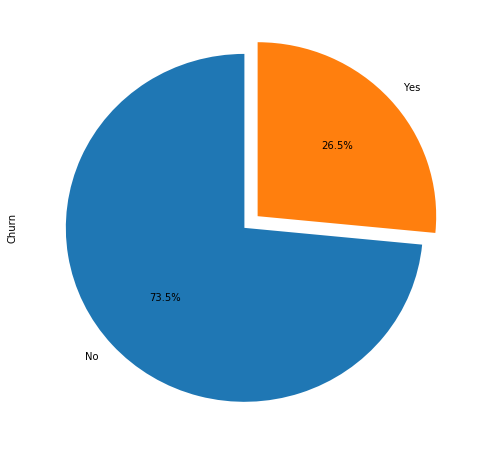

In [4]:
plt.figure(figsize=(8,8))
explode = (0, 0.1)
telecom.Churn.value_counts().plot.pie(explode = explode,autopct='%1.1f%%',startangle=90)
plt.show()

There are approximate 26% people churn rate in data set. Let me understand how this churn rate related to other features.

In [5]:
telecom.MonthlyCharges = telecom.MonthlyCharges.astype('float')

In [6]:
telecom.TotalCharges = telecom.TotalCharges.replace(" ",np.nan)
print ( 'Null Counts : {}'.format(telecom.TotalCharges.isna().sum())) 
# seems there are 11 values are null values. Let them take if off


Null Counts : 11


In [7]:
telecom = telecom.dropna()
data_summary()

No of observations :	7032
No of Features :	21
Features Names :
Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')
Total Missing value counts :	0


In [8]:
print ('Unique values in each features \n{}'.format(telecom.nunique()))

Unique values in each features 
customerID          7032
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                72
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1584
TotalCharges        6530
Churn                  2
dtype: int64


There are 72 different tesnure values. Let then convert them in 6 groups

In [9]:
def tenure_years(df):
    if df['tenure'] <= 12:
        return 'One Year'
    elif df['tenure'] <= 24:
        return 'Two Year'
    elif df['tenure'] <= 36:
        return 'Three Year'
    elif df['tenure'] <= 48:
        return 'Four Year'
    elif df['tenure'] <= 60:
        return 'Five Year'
    elif df['tenure'] <= 72:
        return 'Six Year'
    else:
        return 'Multiple years'
        
#tenure_years.apply(lamda telecom:tenure_years(telecom), axis = 1)
telecom['tenure_cate']= telecom.apply(tenure_years,axis =1)

Most of the features in provided datasets are categorical. Let understand how these categorical valriables related to outcume churn variables

In [10]:
Churn_Yes = telecom[telecom['Churn'] == 'Yes']
Churn_No = telecom[telecom['Churn'] != 'Yes']

In [11]:
def donut_plot(feature):
    fig, ax = plt.subplots(1,2, figsize=(16,8))
    size = 0.7

    Churn_Yes[feature].value_counts().plot.pie(ax = ax[0],autopct='%1.1f%%',
                                                   startangle=90,wedgeprops=dict(width=size, edgecolor='w'))

    Churn_No[feature].value_counts().plot.pie(ax = ax[1],autopct='%1.1f%%',
                                                  startangle=90,wedgeprops=dict(width=size, edgecolor='w'))

    ax[0].set(aspect="equal", title='Pie plot with Churn Yes',ylabel='')
    ax[1].set(aspect="equal", title='Pie plot with Churn No',ylabel='')
    plt.show()

### Churn/ No Churn Distribution By Payment Method

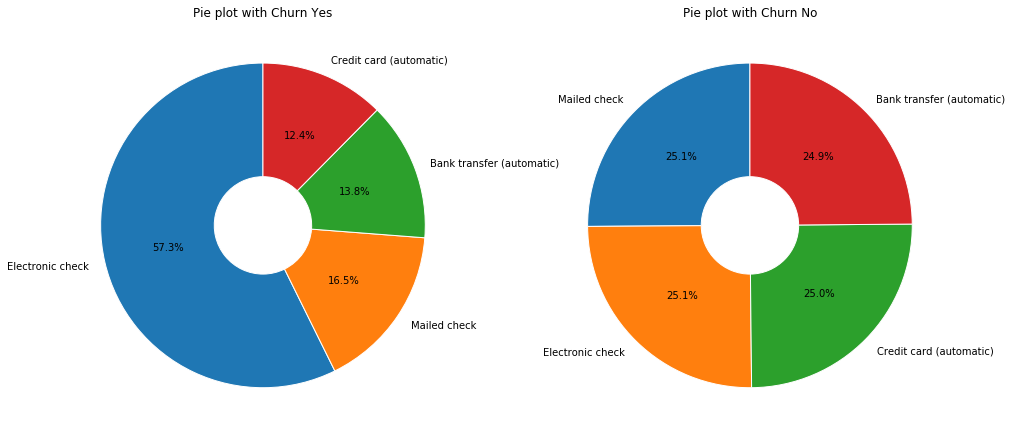

In [12]:
donut_plot(feature = "PaymentMethod")

### Churn/ No Churn Distribution By Paperless Billing

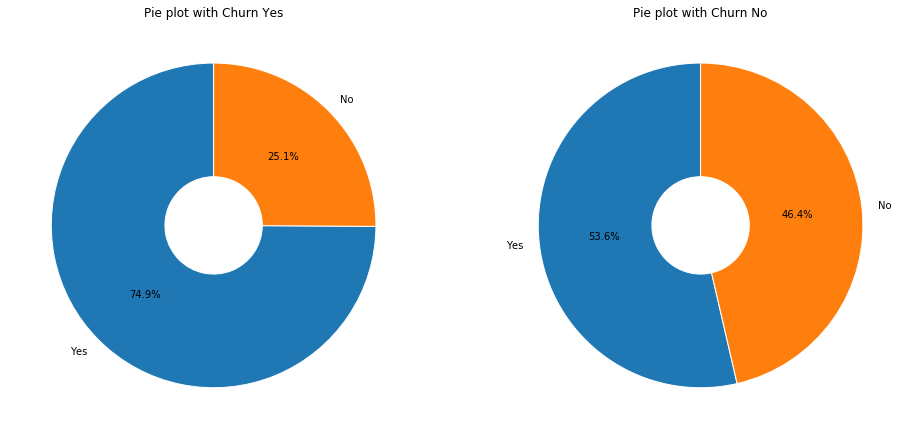

In [13]:
donut_plot(feature = "PaperlessBilling")

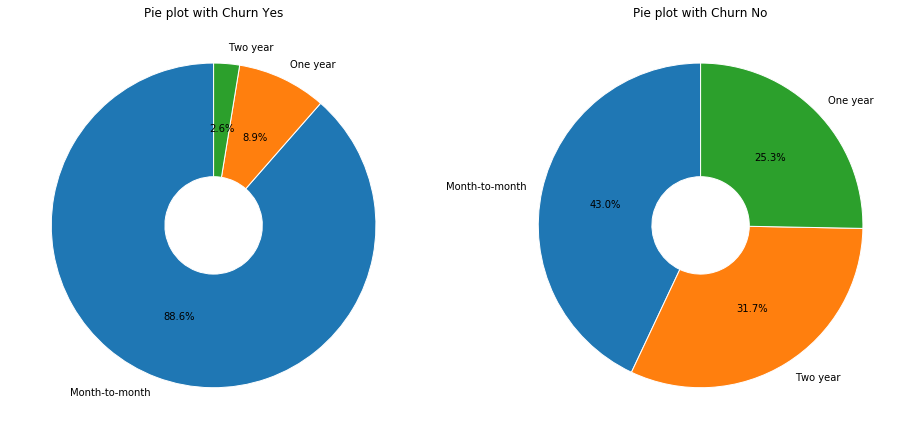

In [14]:
donut_plot(feature = "Contract")

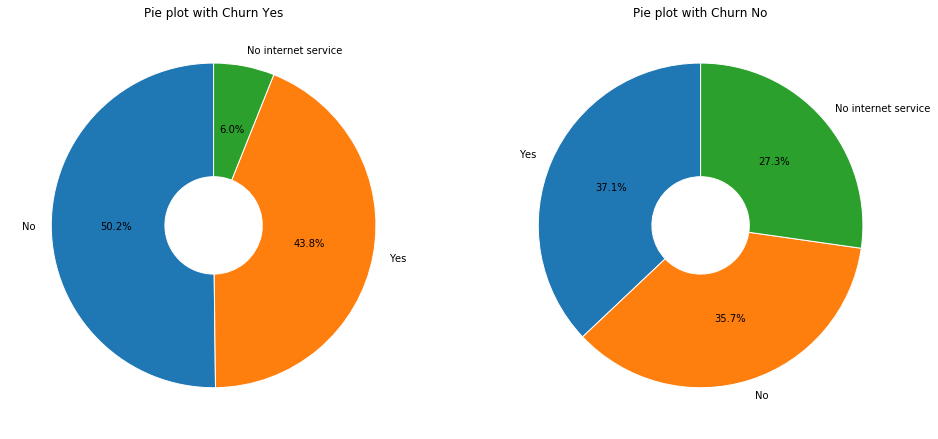

In [15]:
donut_plot(feature = "StreamingMovies")

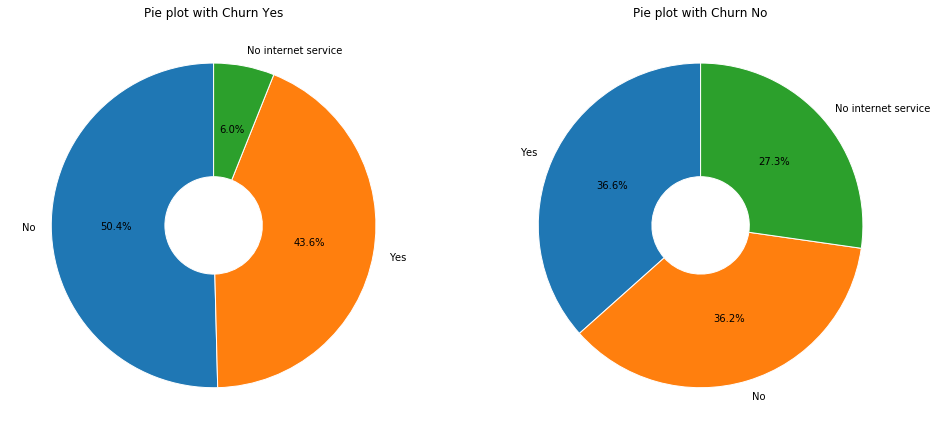

In [16]:
donut_plot(feature = "StreamingTV")

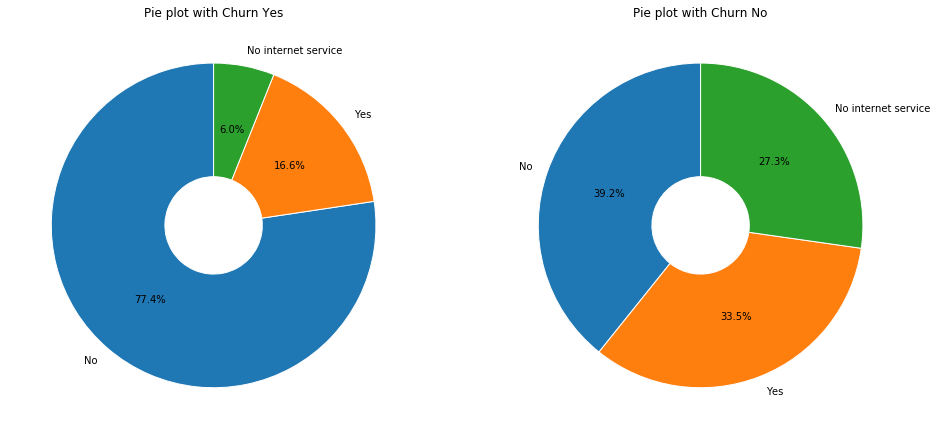

In [17]:
donut_plot(feature = "TechSupport")

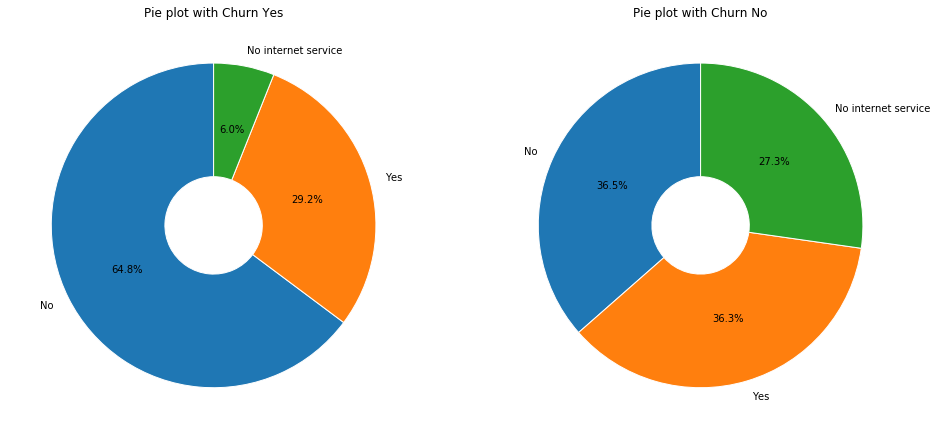

In [18]:
donut_plot(feature = "DeviceProtection")

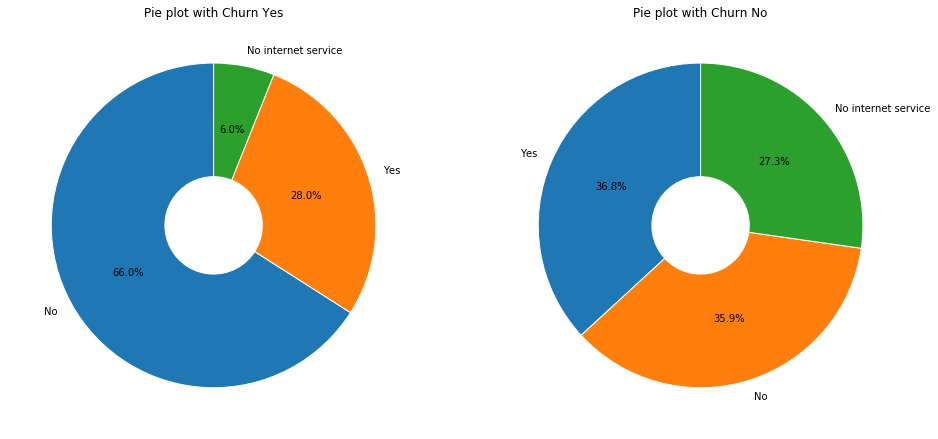

In [19]:
donut_plot(feature = "OnlineBackup")

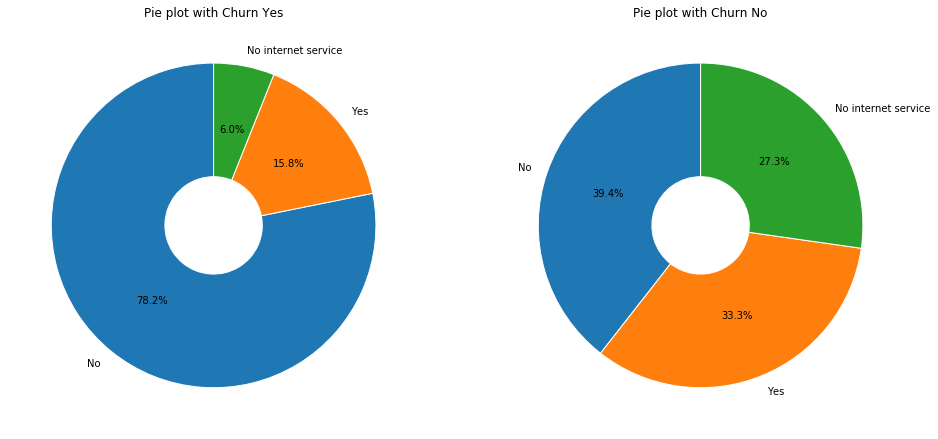

In [20]:
donut_plot(feature = "OnlineSecurity")

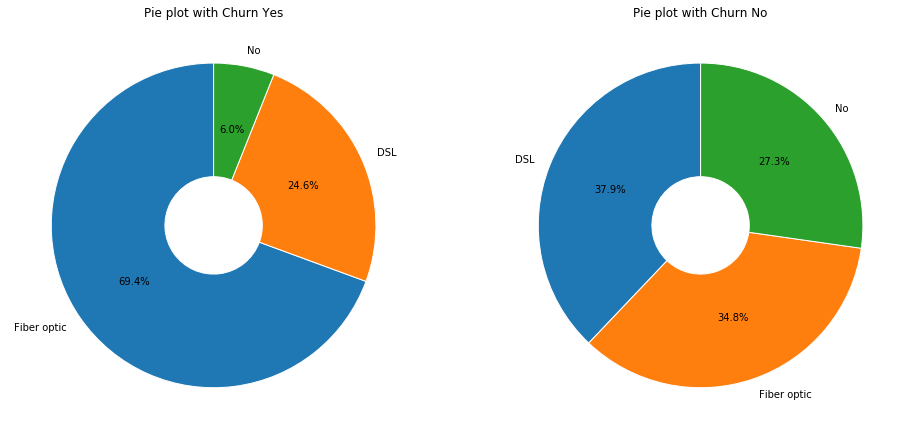

In [21]:
donut_plot(feature = "InternetService")

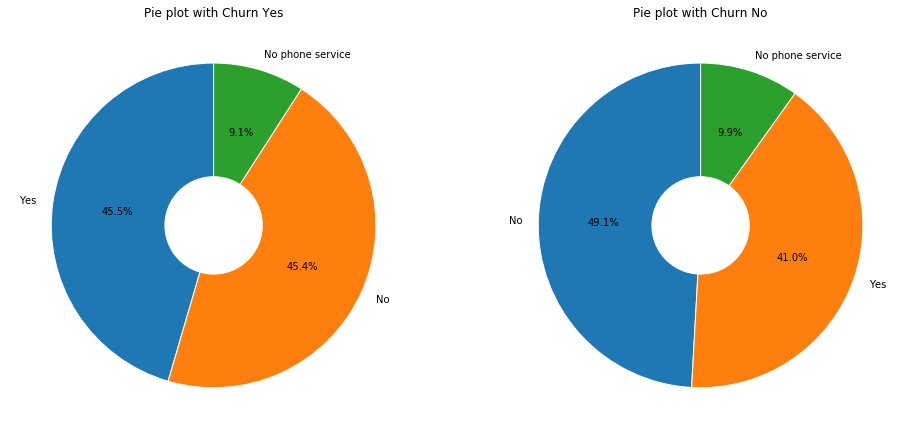

In [22]:
donut_plot(feature = "MultipleLines")

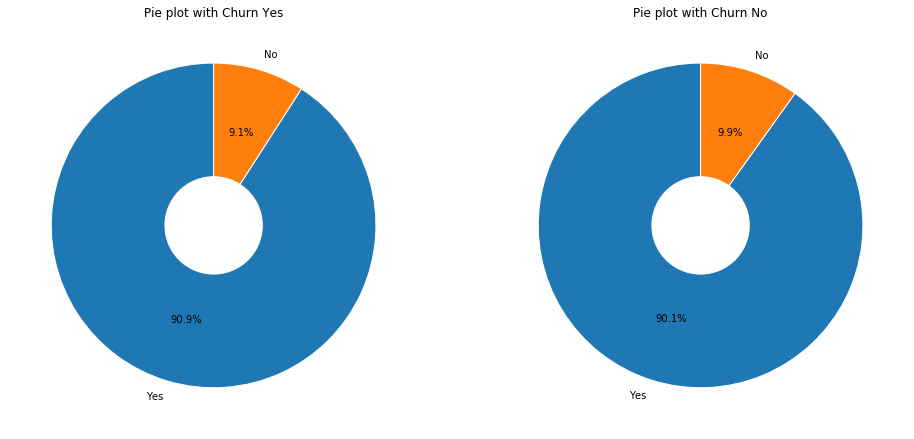

In [23]:
donut_plot(feature = "PhoneService")

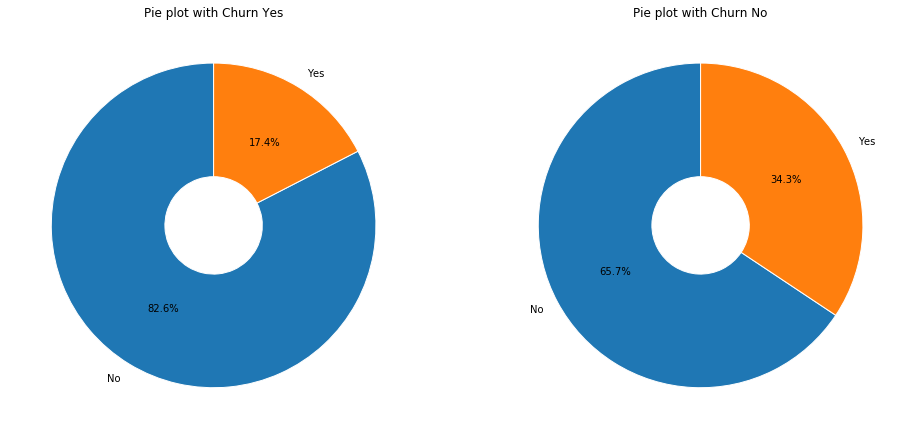

In [24]:
donut_plot(feature = "Dependents")

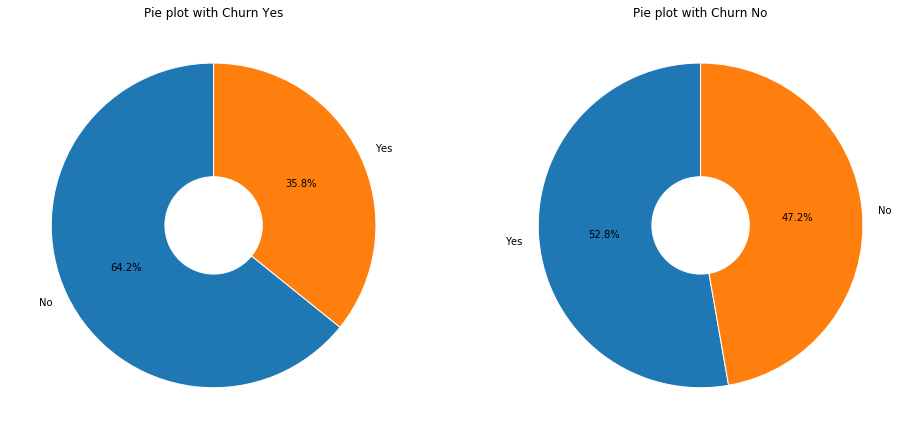

In [25]:
donut_plot(feature = "Partner")

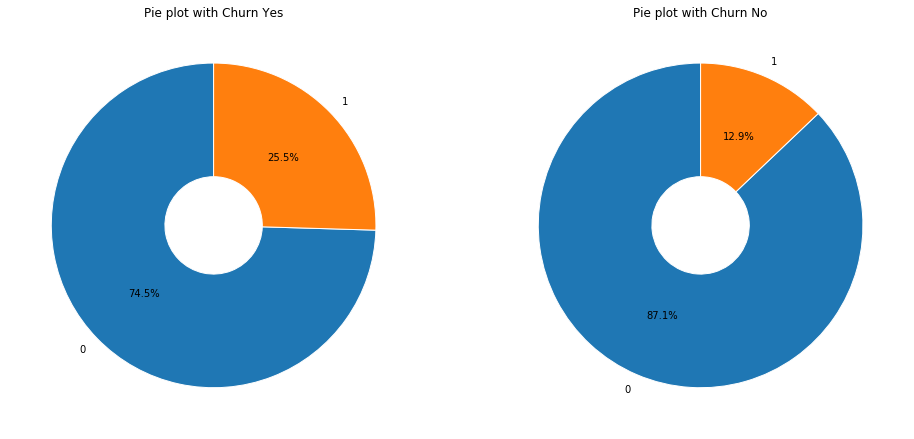

In [26]:
donut_plot(feature = "SeniorCitizen")

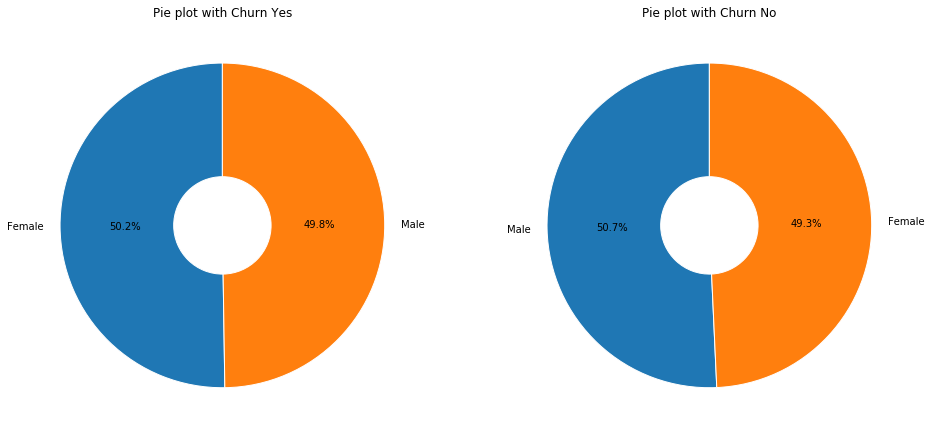

In [27]:
donut_plot(feature = "gender")

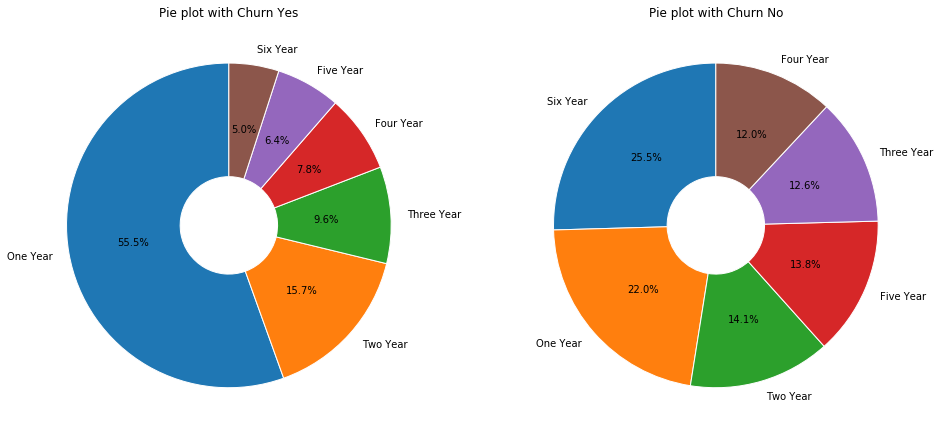

In [28]:
donut_plot(feature = "tenure_cate")

In [71]:
import plotly.plotly as py
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go
init_notebook_mode(connected=True)

In [68]:
def plot_hist(feature, title):
    trace0 = go.Histogram(x = Churn_Yes[feature],name = 'Churn Yes', histfunc = "count")
    trace1 = go.Histogram(x = Churn_No[feature], name = 'Churn No', histfunc = "count")
    data = [trace0,trace1]
    layout = go.Layout(title = title)
    fig = go.Figure(data=data, layout=layout)
    iplot(fig, filename='basic histogram')

In [69]:
plot_hist(feature = "MonthlyCharges",title = "Monthly Charges")

In [70]:
plot_hist(feature = "TotalCharges", title = "Total Charges")